In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
path = "/content/gdrive/MyDrive/ML/Datasets/turkiye-student-evaluation_generic.csv"
data = pd.read_csv(path, sep = ",")

Этот набор данных содержит в общей сложности 5820 оценок, предоставленных студентами Университета Гази в Анкаре (Турция). Всего есть 28 вопросов по курсу и 5 дополнительных атрибутов.



instr - код инструктора

class	- код курса, значения взяты из {1-13}

nb.repeat - количество раз, когда студент проходит этот курс

attendance - код уровня посещаемости, значения из {0, 1, 2, 3, 4}

difficulty - уровень сложности курса, воспринимаемый студентом; значения взяты из {1,2,3,4,5}


Q1-Q28 все относятся к типу Лайкерта, что означает, что значения взяты из {1,2,3,4,5}

Q1: содержание семестрового курса, метод обучения и система оценки были предоставлены в начале.

Q2: Цели и задачи курса были четко сформулированы в начале периода.

Q3: Курс стоил присвоенной ему суммы кредита.

Q4: Курс преподавался в соответствии с программой, объявленной в первый день занятий.

Q5: Обсуждения в классе, домашние задания, приложения и исследования были удовлетворительными.

Q6: Учебники и другие ресурсы курсов были достаточными и актуальными.

Q7: Курс допускал полевые работы, приложения, лабораторные, обсуждения и другие исследования.

Q8: Тесты, задания, проекты и экзамены способствовали обучению.

Q9: Мне очень понравился урок, и я очень хотел активно участвовать в лекциях.

Q10: Мои первоначальные ожидания относительно курса оправдались в конце периода или года.

Q11: Курс был актуален и полезен для моего профессионального развития.

Q12: Курс помог мне взглянуть на жизнь и мир с новой точки зрения.

Q13: Знания инструктора были актуальными и актуальными.

Q14: Инструктор пришел подготовленным к занятиям.

Q15: Инструктор преподавал в соответствии с объявленным планом урока.

Q16: Инструктор был привержен курсу и был понятен.

Q17: Инструктор прибыл вовремя на занятия.

В18: Инструктор легко и быстро произносит речь.

Q19: Инструктор эффективно использовал часы занятий.

Q20: Инструктор объяснил курс и очень хотел помочь студентам.

Q21: Преподаватель продемонстрировал положительный подход к студентам.

Q22: Преподаватель был открыт и уважительно относился к мнению студентов о курсе.

Q23: Инструктор поощрял участие в курсе.

В24: Преподаватель давал соответствующие домашние задания / проекты и помогал / руководил студентами.

В25: Инструктор ответил на вопросы о курсе внутри и вне курса.

Q26: Система оценки преподавателя (промежуточные и заключительные вопросы, проекты, задания и т. Д.) Эффективно измеряла цели курса.

Q27: Преподаватель предоставил решения к экзаменам и обсудил их со студентами.

Q28: Преподаватель относился ко всем студентам правильно и объективно.

In [ ]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
data = data.drop(["instr", "class"], axis = 1)

In [ ]:
data.shape

(5820, 31)

In [ ]:
data.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
scaler = StandardScaler() 
scaler.fit(data) 
X_scale = scaler.transform(data)
df_scale = pd.DataFrame(X_scale, columns = data.columns) 
df_scale.head()

,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,-0.402174,-1.136118,0.901862,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
1,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
2,-0.402174,0.219954,0.901862,1.543745,1.49876,1.453023,1.492837,1.481107,1.477798,1.511882,1.525729,1.445452,1.497239,1.402075,1.504551,1.390102,1.361550,1.366876,1.421233,1.263627,1.389003,1.370552,1.342957,1.332907,1.326612,1.413075,1.436873,1.342258,1.399225,1.428430,1.323265
3,-0.402174,-0.458082,0.160501,0.052278,-0.05749,-0.142561,-0.064208,-0.082761,-0.083851,-0.051856,-0.032667,-0.130814,-0.071143,-0.141932,-0.027241,-0.192062,-0.231739,-0.229275,-0.131677,-0.314382,-0.173877,-0.206321,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948
4,-0.402174,-1.136118,-1.322221,-1.439189,-1.61374,-1.738145,-1.621254,-1.646630,-1.645501,-1.615594,-1.591064,-1.707080,-1.639525,-1.685938,-1.559033,-1.774225,-1.825028,-1.825426,-1.684588,-1.892390,-1.736757,-1.783194,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160


In [ ]:
from sklearn.decomposition import PCA

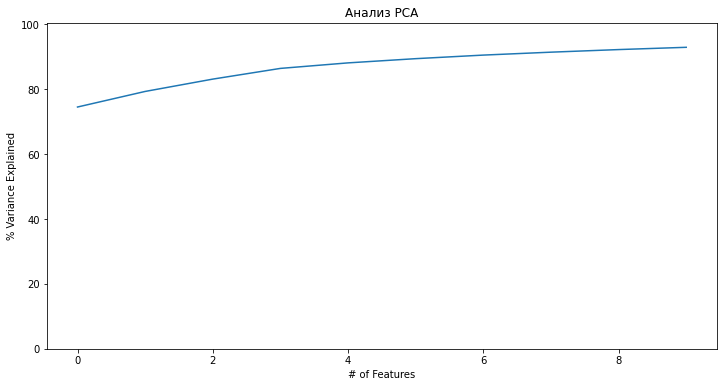

In [ ]:
pca = PCA(n_components = 10) 
pca.fit(df_scale)

variance = pca.explained_variance_ratio_
var = np.cumsum (np.round (variance, 3) * 100) 
plt.figure(figsize = (12,6)) 
plt.ylabel('% Variance Explained') 
plt.xlabel('# of Features') 
plt .title('Анализ PCA') 
plt.ylim(0, 100.5)
plt.plot(var)

In [ ]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [ ]:
%%time
X_tsne = TSNE(n_components = 2, verbose = 1).fit_transform(df_scale)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5820 samples in 0.050s...
[t-SNE] Computed neighbors for 5820 samples in 1.485s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5820
[t-SNE] Computed conditional probabilities for sample 2000 / 5820
[t-SNE] Computed conditional probabilities for sample 3000 / 5820
[t-SNE] Computed conditional probabilities for sample 4000 / 5820
[t-SNE] Computed conditional probabilities for sample 5000 / 5820
[t-SNE] Computed conditional probabilities for sample 5820 / 5820
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.450531
[t-SNE] KL divergence after 1000 iterations: 1.035782
CPU times: user 1min 54s, sys: 307 ms, total: 1min 54s
Wall time: 59.1 s


In [ ]:
X_tsne = pd.DataFrame(X_tsne)
X_tsne.rename(columns = {0:'1-я компонента', 1:'2-я компонента'}, inplace = True)
X_tsne.head()

,1-я компонента,2-я компонента
0,28.758709,33.343700
1,-7.707998,12.195152
2,-4.148950,-74.653625
3,-8.395998,12.595482
4,-22.871746,57.581108


No handles with labels found to put in legend.


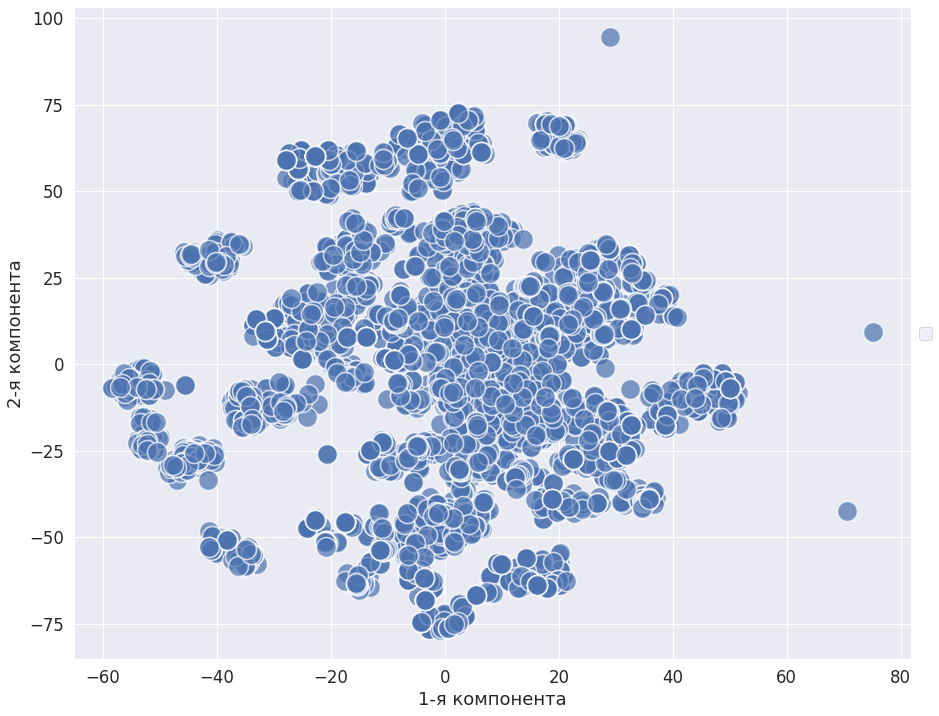

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
g = sns.scatterplot(x = "1-я компонента", y = "2-я компонента", data = X_tsne, s = 400, alpha = 0.7)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

CPU times: user 7.77 s, sys: 5.54 s, total: 13.3 s
Wall time: 6.8 s


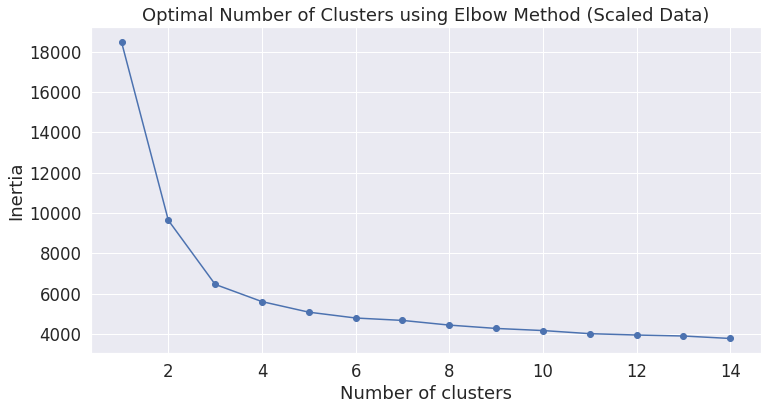

In [ ]:
%%time
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(data_transformed)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = 100, max_iter = 400, init = 'k-means++').fit(data_transformed)

In [ ]:
X_tsne["Kmeans3"] = kmeans.labels_
X_tsne["Kmeans3"] = X_tsne["Kmeans3"].astype("string")

In [ ]:
X_tsne.head()

,1-я компонента,2-я компонента,Kmeans5,Kmeans3
0,28.758709,33.343700,0,1
1,-7.707998,12.195152,0,1
2,-4.148950,-74.653625,3,0
3,-8.395998,12.595482,0,1
4,-22.871746,57.581108,2,2


In [ ]:
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(data_transformed, kmeans.labels_, metric = 'euclidean')))

KMeans Scaled Silhouette Score: 0.3569578960617715


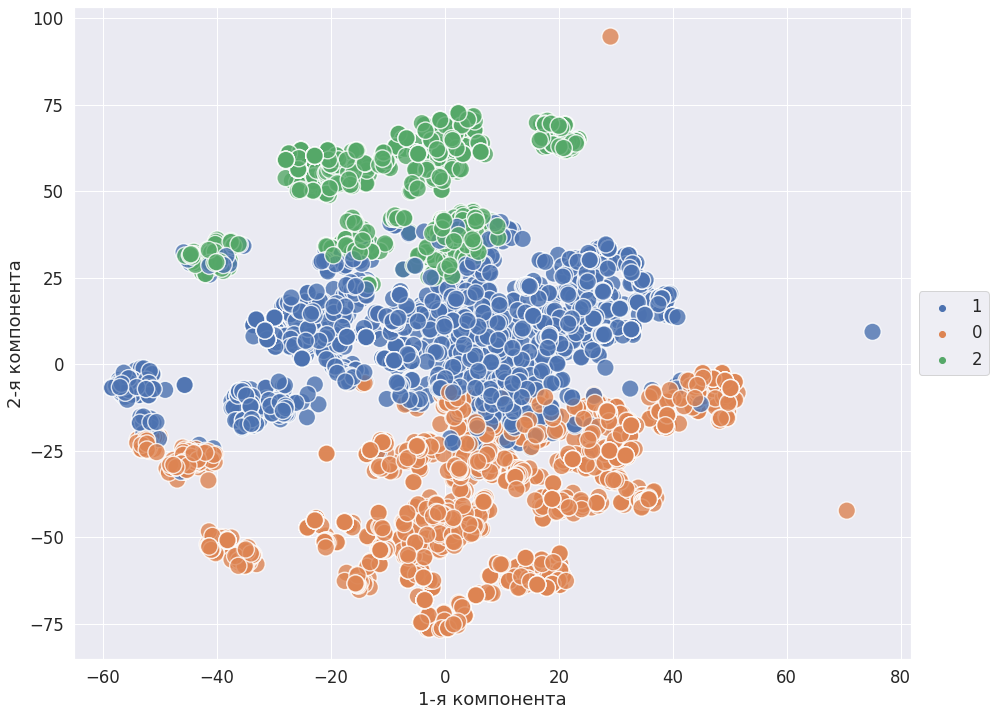

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
g = sns.scatterplot(x = "1-я компонента", y = "2-я компонента", hue = "Kmeans3", data = X_tsne, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

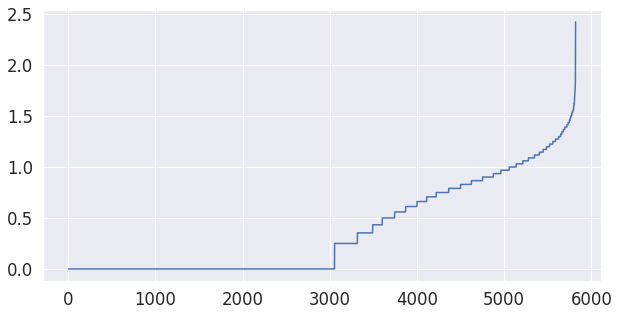

In [ ]:
plt.figure(figsize=(10, 5))
nn = NearestNeighbors(n_neighbors=5).fit(data_transformed)
distances, idx = nn.kneighbors(data_transformed)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [ ]:
data_transformed.shape

(5820, 31)

In [ ]:
%%time
clustering = DBSCAN(eps = 1.5, min_samples = 500).fit(data_transformed)

X_tsne["DBSCAN_02"] = clustering.labels_
X_tsne["DBSCAN_02"] = X_tsne["DBSCAN_02"].astype("string")

CPU times: user 2.95 s, sys: 8.74 ms, total: 2.95 s
Wall time: 2.96 s


In [ ]:
X_tsne.head()

,1-я компонента,2-я компонента,Kmeans5,Kmeans3,DBSCAN,DBSCAN_1,DBSCAN_02
0,28.758709,33.343700,0,1,0,0,0
1,-7.707998,12.195152,0,1,0,0,0
2,-4.148950,-74.653625,3,0,0,0,0
3,-8.395998,12.595482,0,1,0,0,0
4,-22.871746,57.581108,2,2,0,0,0


In [ ]:
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(data_transformed, labels))

Estimated number of clusters: 1
Estimated number of noise points: 73
Silhouette Coefficient: 0.201


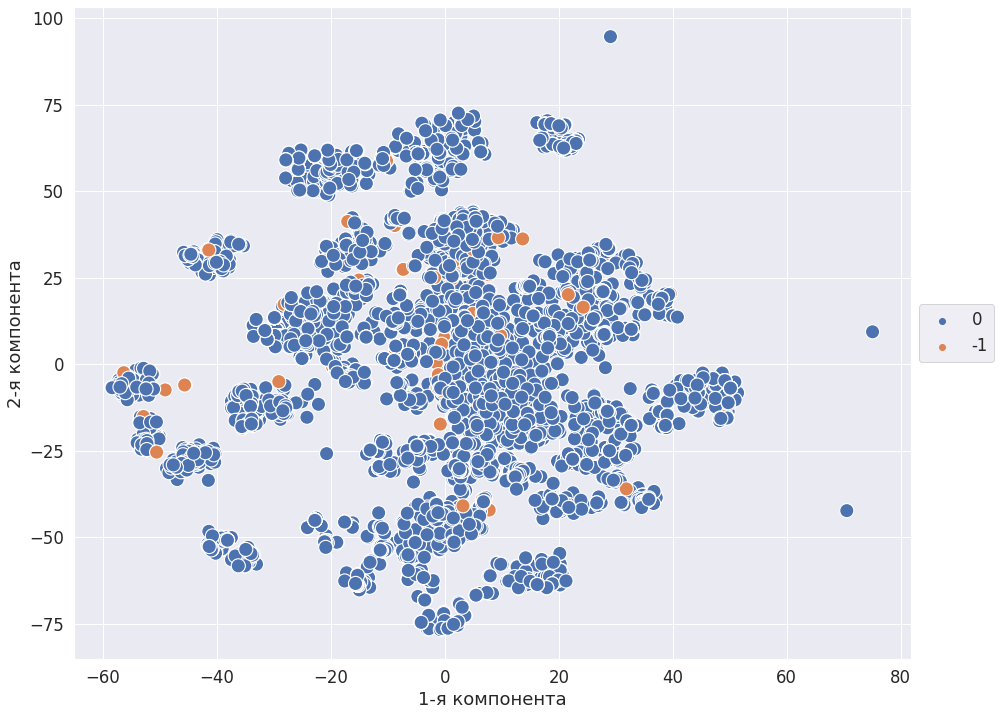

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
g = sns.scatterplot(x = "1-я компонента", y = "2-я компонента", hue = "DBSCAN_02", data = X_tsne, s = 200)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [ ]:
%%time
eps_values = np.arange(0.9, 2.2, 0.1) 

no_of_clusters = []
sil_score = []
epsvalues = []

for p in eps_values:
    dbscan_cluster = DBSCAN(eps = p, min_samples = 10).fit(data_transformed)
    epsvalues.append(p)
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))
    sil_score.append(silhouette_score(data_transformed, dbscan_cluster.labels_))
  
eps_min = list(zip(no_of_clusters, sil_score, epsvalues))
eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'silhouette_score', 'epsilon_values'])

CPU times: user 48.3 s, sys: 1.53 s, total: 49.8 s
Wall time: 47.6 s


In [ ]:
eps_min_df

,no_of_clusters,silhouette_score,epsilon_values
0,2,0.072416,0.9
1,2,0.096112,1.0
2,2,0.114976,1.1
3,2,0.130332,1.2
4,2,0.152802,1.3
5,2,0.163884,1.4
6,2,0.193689,1.5
7,2,0.212926,1.6
8,2,0.253237,1.7
9,2,0.282613,1.8


In [ ]:
%%time
clustering = DBSCAN(eps = 2.2, min_samples = 10).fit(data_transformed)

X_tsne["DBSCAN_22"] = clustering.labels_
X_tsne["DBSCAN_22"] = X_tsne["DBSCAN_22"].astype("string")

CPU times: user 3.12 s, sys: 15 ms, total: 3.14 s
Wall time: 3.14 s


In [ ]:
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(data_transformed, labels))

Estimated number of clusters: 1
Estimated number of noise points: 1
Silhouette Coefficient: 0.317


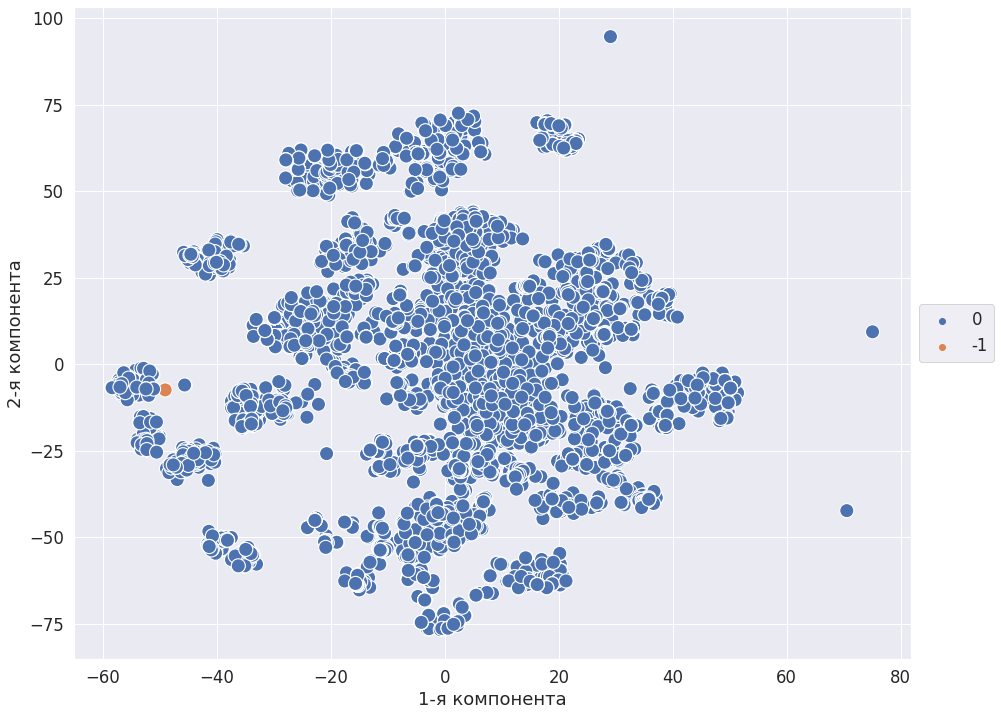

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
g = sns.scatterplot(x = "1-я компонента", y = "2-я компонента", hue = "DBSCAN_22", data = X_tsne, s = 200)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
clust = OPTICS(min_samples = 500).fit(data_transformed)

In [ ]:
X_tsne["OPTICS"] = clust.labels_
X_tsne["OPTICS"] = X_tsne["OPTICS"].astype("string")

In [ ]:
X_tsne.head()

,1-я компонента,2-я компонента,Kmeans5,Kmeans3,DBSCAN,DBSCAN_1,DBSCAN_02,DBSCAN_22,OPTICS
0,28.758709,33.343700,0,1,0,0,0,0,0
1,-7.707998,12.195152,0,1,0,0,0,0,0
2,-4.148950,-74.653625,3,0,0,0,0,0,-1
3,-8.395998,12.595482,0,1,0,0,0,0,0
4,-22.871746,57.581108,2,2,0,0,0,0,-1


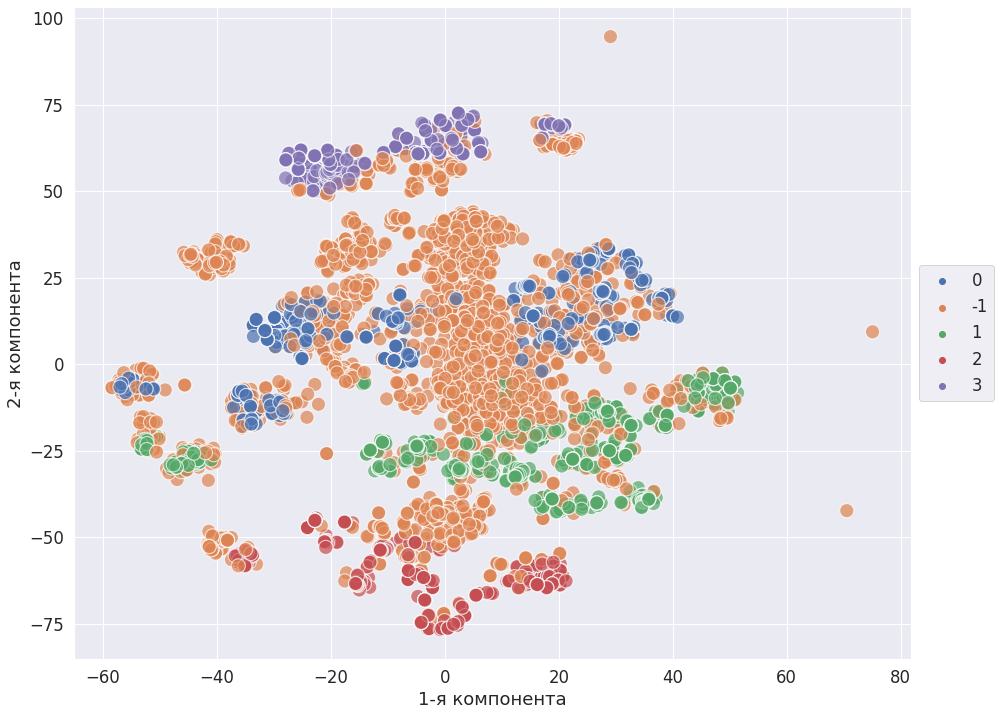

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
g = sns.scatterplot(x = "1-я компонента", y = "2-я компонента", hue = "OPTICS", data = X_tsne, s = 200, alpha = 0.7)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [ ]:
X_tsne.OPTICS.value_counts()

-1    2429
0     1145
1     1078
2      605
3      563
Name: OPTICS, dtype: Int64

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 4).fit(data_transformed)

X_tsne["Agglomerative"] = clustering.labels_
X_tsne["Agglomerative"] = X_tsne["Agglomerative"].astype("string")

In [ ]:
X_tsne.head()

,1-я компонента,2-я компонента,Kmeans5,Kmeans3,DBSCAN,DBSCAN_1,DBSCAN_02,DBSCAN_22,OPTICS,Agglomerative
0,28.758709,33.343700,0,1,0,0,0,0,0,0
1,-7.707998,12.195152,0,1,0,0,0,0,0,0
2,-4.148950,-74.653625,3,0,0,0,0,0,-1,3
3,-8.395998,12.595482,0,1,0,0,0,0,0,0
4,-22.871746,57.581108,2,2,0,0,0,0,-1,2


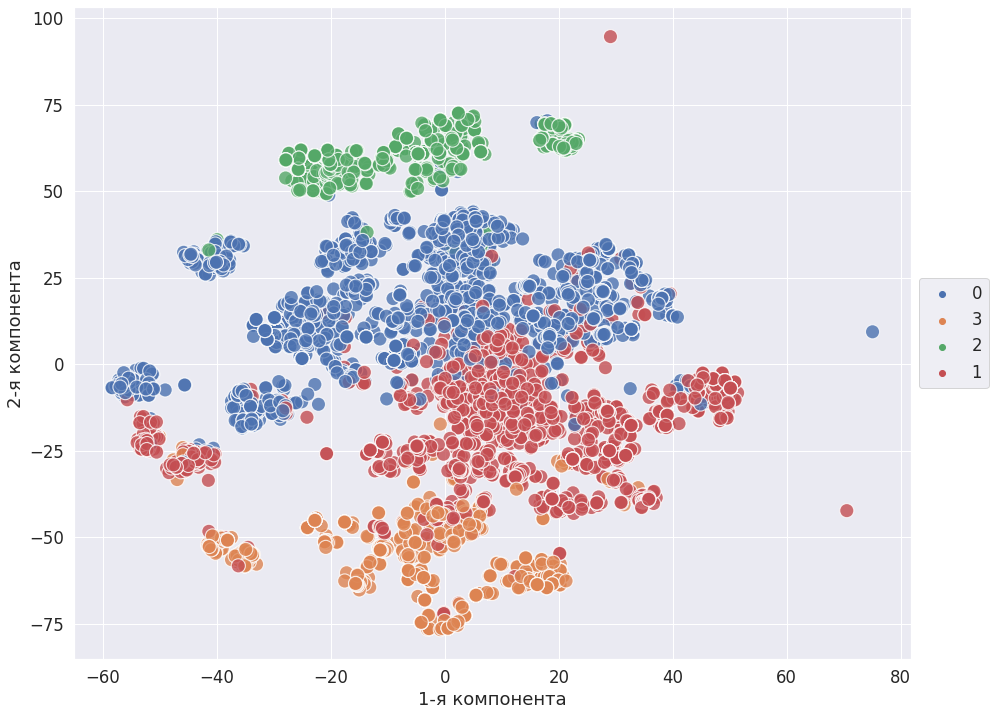

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
g = sns.scatterplot(x = "1-я компонента", y = "2-я компонента", hue = "Agglomerative", data = X_tsne, s = 200, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

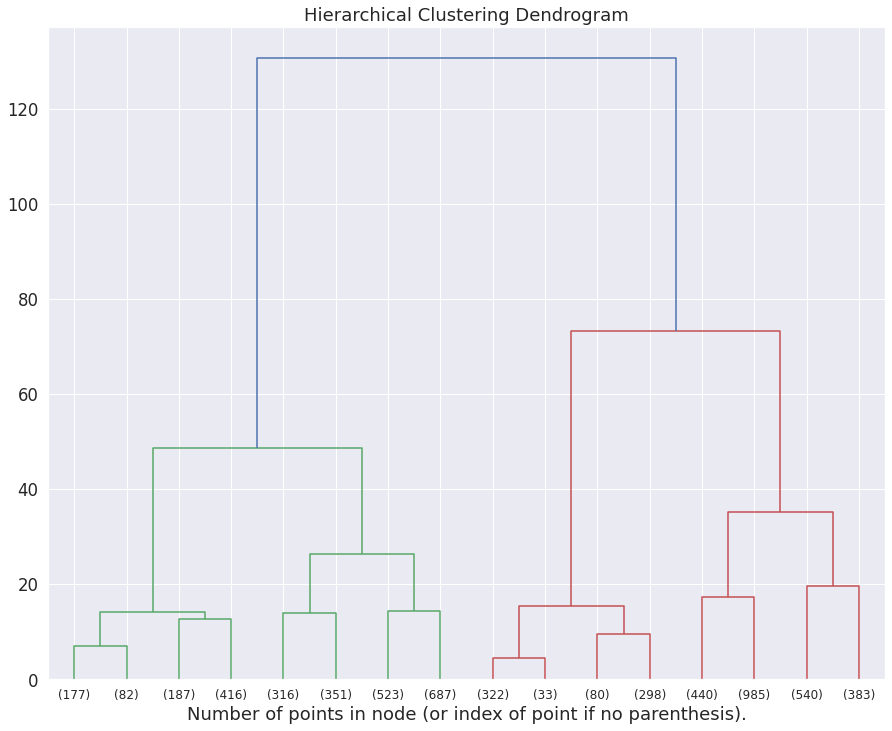

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

clustering = AgglomerativeClustering(n_clusters = None, distance_threshold = 0).fit(data_transformed)

f, ax = plt.subplots(figsize=(15, 12))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
!pip install boruta

     |████████████████████████████████| 61kB 3.2MB/s 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', n_estimators = 100)

In [ ]:
boruta_feature_selector = BorutaPy(rf, n_estimators = 'auto', verbose = 1, random_state = 42, max_iter = 50, perc = 90)

In [ ]:
boruta_feature_selector.fit(np.array(data_transformed), clustering.labels_)

Iteration: 1 / 50
Iteration: 2 / 50
Iteration: 3 / 50
Iteration: 4 / 50
Iteration: 5 / 50
Iteration: 6 / 50
Iteration: 7 / 50
Iteration: 8 / 50
Iteration: 9 / 50
Iteration: 10 / 50
Iteration: 11 / 50
Iteration: 12 / 50
Iteration: 13 / 50
Iteration: 14 / 50
Iteration: 15 / 50
Iteration: 16 / 50
Iteration: 17 / 50
Iteration: 18 / 50
Iteration: 19 / 50


BorutaPy finished running.

Iteration: 	20 / 50
Confirmed: 	30
Tentative: 	0
Rejected: 	1


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=77, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7FD1A9BE7CA8,
                                          verbose=0, warm_star

In [ ]:
boruta_feature_selector.ranking_

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

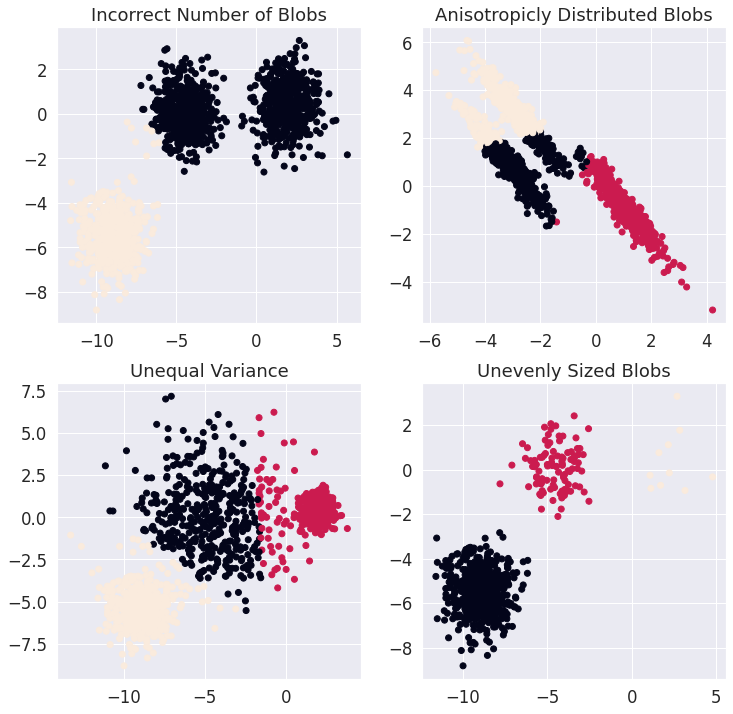

In [ ]:

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)


plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,